# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
import pprint

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

response = requests.get(query_url + city)
json = response.json()
print(json)

{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.64, 'feels_like': 44.71, 'temp_min': 51.64, 'temp_max': 51.64, 'pressure': 1023, 'humidity': 85, 'sea_level': 1023, 'grnd_level': 1012}, 'wind': {'speed': 11.21, 'deg': 174}, 'clouds': {'all': 61}, 'dt': 1589251017, 'sys': {'country': 'CL', 'sunrise': 1589197479, 'sunset': 1589234242}, 'timezone': -14400, 'id': 3883457, 'name': 'Lebu', 'cod': 200}


In [7]:
print(requests.get(query_url + city))

<Response [200]>


In [12]:
# create lists to hold response data
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

counter = 1

# create loop through all cities and request the data for each list
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Recorded city {counter} - {city_record}")
        
        counter += 1
    except:
        print('No city found. Next..')
    continue

Recorded city 1 - Puerto Ayora
Recorded city 2 - Saint-Joseph
No city found. Next..
Recorded city 3 - Zhaoyuan
Recorded city 4 - Yellowknife
Recorded city 5 - Busselton
Recorded city 6 - Longyearbyen
Recorded city 7 - Coquimbo
Recorded city 8 - Payakumbuh
Recorded city 9 - Mataura
Recorded city 10 - Thompson
Recorded city 11 - Jamestown
Recorded city 12 - Olinda
Recorded city 13 - Norsup
Recorded city 14 - Mahébourg
Recorded city 15 - La Vergne
Recorded city 16 - Salinópolis
Recorded city 17 - Atuona
Recorded city 18 - Upernavik
Recorded city 19 - Ushuaia
Recorded city 20 - Rikitea
Recorded city 21 - Chokurdakh
No city found. Next..
Recorded city 22 - Qaanaaq
No city found. Next..
No city found. Next..
Recorded city 23 - Bluff
Recorded city 24 - Mirny
Recorded city 25 - Vol'sk
Recorded city 26 - Tuktoyaktuk
Recorded city 27 - Zaysan
Recorded city 28 - Pevek
Recorded city 29 - Presidencia Roque Sáenz Peña
Recorded city 30 - Provideniya
Recorded city 31 - Manggar
Recorded city 32 - Pineg

Recorded city 263 - Merrill
Recorded city 264 - Novy Urengoy
No city found. Next..
Recorded city 265 - Bud
No city found. Next..
Recorded city 266 - Lorengau
Recorded city 267 - Kampot
Recorded city 268 - Scarborough
Recorded city 269 - Yārāda
Recorded city 270 - Te Anau
Recorded city 271 - Los Llanos de Aridane
Recorded city 272 - Gushikawa
Recorded city 273 - Hualmay
No city found. Next..
Recorded city 274 - Nishihara
Recorded city 275 - Ubari
No city found. Next..
Recorded city 276 - Lahad Datu
Recorded city 277 - Sangīn
Recorded city 278 - Klaksvík
Recorded city 279 - Eureka
Recorded city 280 - Honiara
Recorded city 281 - Tutóia
Recorded city 282 - Cleburne
Recorded city 283 - Lüderitz
Recorded city 284 - La Seyne-sur-Mer
Recorded city 285 - Berkåk
No city found. Next..
Recorded city 286 - Bethel
No city found. Next..
Recorded city 287 - Chimoré
Recorded city 288 - Saskylakh
Recorded city 289 - Vangaindrano
Recorded city 290 - Candelaria
Recorded city 291 - Camocim
Recorded city 29

Recorded city 521 - Reconquista
Recorded city 522 - Adré
Recorded city 523 - La Asuncion
Recorded city 524 - Wiarton
Recorded city 525 - Broome
Recorded city 526 - Acapulco de Juárez
Recorded city 527 - Akçaabat
Recorded city 528 - Puerto Peñasco
Recorded city 529 - Upata
Recorded city 530 - La Mira
Recorded city 531 - Vostok
Recorded city 532 - Kitob
Recorded city 533 - Amarante do Maranhão
Recorded city 534 - Irtyshskiy
No city found. Next..
Recorded city 535 - Lālmohan
Recorded city 536 - Samur
Recorded city 537 - Bima
Recorded city 538 - Samaná
Recorded city 539 - Piaçabuçu
No city found. Next..
Recorded city 540 - Qian’an
Recorded city 541 - Chiredzi
Recorded city 542 - Bayangol
Recorded city 543 - Vlorë
Recorded city 544 - Quang Ngai
Recorded city 545 - Aykino
Recorded city 546 - Taunggyi
Recorded city 547 - Leh
Recorded city 548 - Kaset Sombun
Recorded city 549 - Fare
Recorded city 550 - Batemans Bay
No city found. Next..
Recorded city 551 - Kargasok
Recorded city 552 - Praia
Re

In [10]:
print(cities)

['puerto ayora', 'saint-joseph', 'aflu', 'zhaoyuan', 'yellowknife', 'busselton', 'longyearbyen', 'coquimbo', 'payakumbuh', 'mataura', 'thompson', 'jamestown', 'olinda', 'norsup', 'mahebourg', 'la vergne', 'salinopolis', 'atuona', 'upernavik', 'ushuaia', 'rikitea', 'chokurdakh', 'kamenskoye', 'qaanaaq', 'solsvik', 'illoqqortoormiut', 'bluff', 'mirnyy', 'volsk', 'tuktoyaktuk', 'zaysan', 'pevek', 'presidencia roque saenz pena', 'provideniya', 'manggar', 'pinega', 'verkh-usugli', 'tungkang', 'chuy', 'kodiak', 'taolanaro', 'east london', 'iqaluit', 'bintulu', 'haimen', 'winchester', 'swift current', 'hilo', 'butaritari', 'new norfolk', 'harper', 'havoysund', 'kapaa', 'la ronge', 'horki', 'pasni', 'hami', 'thunder bay', 'apomu', 'grand gaube', 'koroni', 'halalo', 'sept-iles', 'lensk', 'mount isa', 'port alfred', 'port elizabeth', 'khatanga', 'naze', 'kattivakkam', 'nizhneyansk', 'baykit', 'hailar', 'fraserburgh', 'hobart', 'cape town', 'saint george', 'san cristobal', 'faya', 'airai', 'porto

615

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_data = {
    "City": city_name,
    "Country" : country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
    
}

weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../output_data/weather_df.csv")

In [15]:
weather_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,1589251587,-0.74,-90.35,75.99,95,99,1.01
1,Saint-Joseph,RE,1589251587,-21.37,55.62,68.00,60,90,4.70
2,Zhaoyuan,CN,1589251588,37.36,120.40,64.49,30,0,18.90
3,Yellowknife,CA,1589251535,62.46,-114.35,46.40,42,75,13.87
4,Busselton,AU,1589251588,-33.65,115.33,62.01,81,100,5.01
...,...,...,...,...,...,...,...,...,...
553,Zhuhai,CN,1589251673,22.28,113.57,84.00,78,20,4.70
554,Ulaangom,MN,1589251723,49.98,92.07,68.18,22,85,4.14
555,Palmer,US,1589251610,42.16,-72.33,45.00,87,91,3.00
556,Shimoda,JP,1589251723,34.67,138.95,79.00,73,75,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

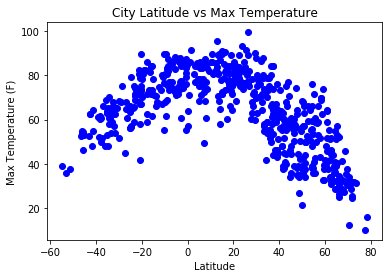

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], facecolor="blue", marker="o")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.show()

plt.savefig("../output_data/latitude_vs_temperature.png")

#### Latitude vs. Humidity Plot

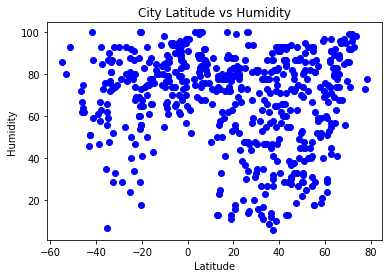

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolor="blue", marker="o")

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

plt.savefig("../output_data/latitude_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

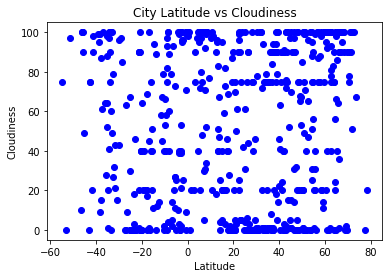

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolor="blue", marker="o")

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

plt.savefig("../output_data/latitude_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

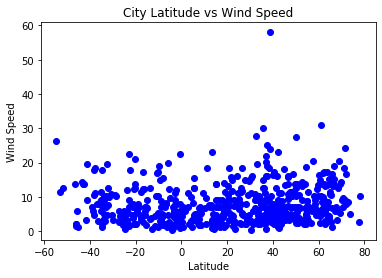

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolor="blue", marker="o")

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

plt.savefig("../output_data/latitude_vs_windspeed.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


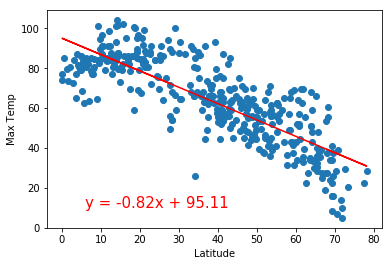

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


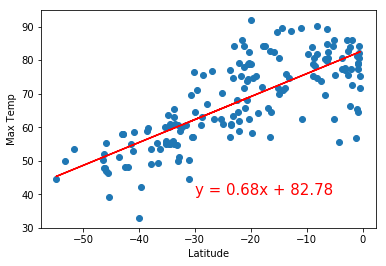

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


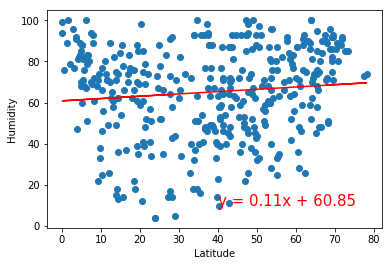

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


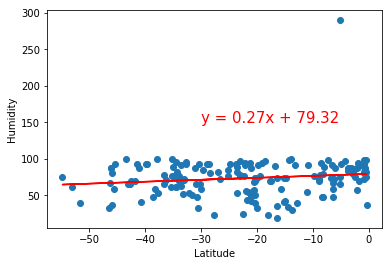

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


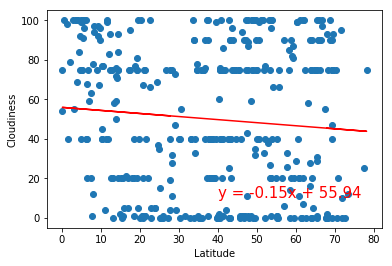

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


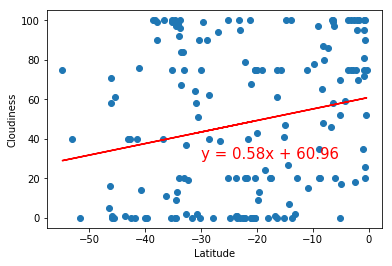

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


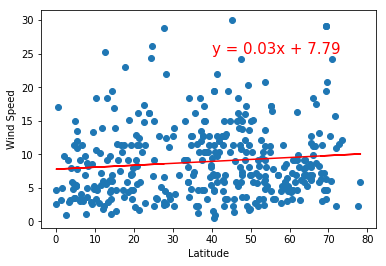

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


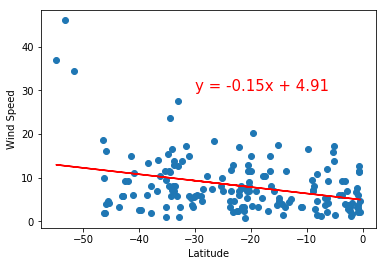